In [2]:
import pandas as pd 
import numpy as np 
import sklearn as skl 
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time
import warnings
import os
import seaborn as sns # for ploting
from sklearn.metrics import fbeta_score, precision_score, recall_score, confusion_matrix,f1_score
import itertools
import pickle

In [3]:
import matplotlib
from matplotlib import pyplot as plt,style
from multiprocessing import Pool

In [4]:
style.use('ggplot')
np.random.seed(42) 

def plot_confusion_matrix(cm, classes,
                          recall,precision,f2,f1,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.text(0,2.3, f" Recall:{recall},\n Precision:{precision},\n F2 Score:{f2},\n F1 Score:{f1}", fontsize=12)
    plt.show()

In [5]:
warnings.simplefilter("ignore", category=DeprecationWarning)

root_feature = '/Users/abhijit/IOT_Project/intl-iot/model/timestep-features/us'
root_model='/Users/abhijit/IOT_Project/intl-iot/models_final/features-testing1.1/us'

root_output=root_model+'/output'
dir_tsne_plots = root_model + '/tsne-plots'

num_pools=12

In [6]:
lfiles = []
lparas= []
ldnames = []
for csv_file in os.listdir(root_feature):
    if csv_file.endswith('.csv'):
        print(csv_file)
        train_data_file = '%s/%s' % (root_feature, csv_file)
        dname = csv_file[:-4]
        lfiles.append(train_data_file)
        ldnames.append(dname)
        lparas.append((train_data_file, dname))
p = Pool(num_pools)

google-home.csv
yi-camera.csv


In [7]:
lparas[1][0]

'/Users/abhijit/IOT_Project/intl-iot/model/timestep-features/us/yi-camera.csv'

In [8]:
data = pd.read_csv(lparas[1][0])
data.head()

,start_time,end_time,meanBytes,minBytes,maxBytes,medAbsDev,skewLength,kurtosisLength,q10,q20,...,kurtosisTBP,skewTBP,network_to,network_from,network_both,network_to_external,network_local,anonymous_source_destination,device,state
0,1.556235e+09,1.556235e+09,163.328125,46,1214,23.721635,2.861602,7.459248,50.0,54.0,...,99.932468,9.733942,63,60,0,5,0,0,yi-camera,power
1,1.556235e+09,1.556235e+09,197.828125,46,1214,32.617249,2.447878,5.591277,54.0,54.0,...,19.684847,4.172923,60,61,0,7,0,0,yi-camera,power
2,1.556235e+09,1.556235e+09,208.929688,46,1214,17.791227,2.325119,3.874229,54.0,54.0,...,45.299843,6.576095,57,67,0,4,0,0,yi-camera,power
3,1.556235e+09,1.556235e+09,170.921875,46,1214,23.721635,2.893928,7.721442,50.0,54.0,...,98.674285,9.656421,54,67,0,7,0,0,yi-camera,power
4,1.556235e+09,1.556235e+09,182.382812,46,1214,23.721635,2.741761,6.339389,50.0,54.0,...,73.393003,7.956755,51,73,0,4,0,0,yi-camera,power


In [9]:
set(data['state'])

{'android_lan_photo',
 'android_lan_recording',
 'android_lan_watch',
 'android_wan_photo',
 'android_wan_recording',
 'android_wan_watch',
 'local_move',
 'power'}

In [11]:
anomaly_data = pd.read_csv('/Users/abhijit/IOT_Project/intl-iot/model/timestep-features/us/google-home.csv')

anomaly_data.head()

,start_time,end_time,meanBytes,minBytes,maxBytes,medAbsDev,skewLength,kurtosisLength,q10,q20,...,kurtosisTBP,skewTBP,network_to,network_from,network_both,network_to_external,network_local,anonymous_source_destination,device,state
0,1.556297e+09,1.556297e+09,487.495536,46,1484,131.951597,0.935539,-1.024790,66.0,66.0,...,50.303391,6.944930,0,0,0,224,0,0,google-home,local_voice
1,1.556297e+09,1.556297e+09,542.160714,46,1484,198.668697,0.753633,-1.344735,66.0,66.0,...,47.878007,6.654165,0,0,0,224,0,0,google-home,local_voice
2,1.556297e+09,1.556297e+09,518.758929,46,1484,131.951597,0.812021,-1.229149,66.0,66.0,...,70.832487,7.742092,0,0,0,224,0,0,google-home,local_voice
3,1.556297e+09,1.556297e+09,658.540179,46,1484,237.216355,0.366541,-1.797007,66.0,66.0,...,69.175286,7.849277,0,0,0,224,0,0,google-home,local_voice
4,1.556297e+09,1.556297e+09,513.950893,62,1484,131.951597,0.831015,-1.217290,66.0,66.0,...,51.553881,6.764841,0,0,0,224,0,0,google-home,local_voice


In [12]:
set(anomaly_data['state'])

{'local_voice', 'local_volume', 'power'}

In [13]:
anomaly_data = anomaly_data[(anomaly_data['state'] == 'local_voice')]

In [14]:
anomaly_data['state'] = 'anomaly'

In [15]:
anomaly_data.head()

,start_time,end_time,meanBytes,minBytes,maxBytes,medAbsDev,skewLength,kurtosisLength,q10,q20,...,kurtosisTBP,skewTBP,network_to,network_from,network_both,network_to_external,network_local,anonymous_source_destination,device,state
0,1.556297e+09,1.556297e+09,487.495536,46,1484,131.951597,0.935539,-1.024790,66.0,66.0,...,50.303391,6.944930,0,0,0,224,0,0,google-home,anomaly
1,1.556297e+09,1.556297e+09,542.160714,46,1484,198.668697,0.753633,-1.344735,66.0,66.0,...,47.878007,6.654165,0,0,0,224,0,0,google-home,anomaly
2,1.556297e+09,1.556297e+09,518.758929,46,1484,131.951597,0.812021,-1.229149,66.0,66.0,...,70.832487,7.742092,0,0,0,224,0,0,google-home,anomaly
3,1.556297e+09,1.556297e+09,658.540179,46,1484,237.216355,0.366541,-1.797007,66.0,66.0,...,69.175286,7.849277,0,0,0,224,0,0,google-home,anomaly
4,1.556297e+09,1.556297e+09,513.950893,62,1484,131.951597,0.831015,-1.217290,66.0,66.0,...,51.553881,6.764841,0,0,0,224,0,0,google-home,anomaly


In [16]:
len(anomaly_data)

390

In [17]:
ss = StandardScaler()
data_features = data.drop(['device'], axis=1).fillna(-1)
anomaly_features = anomaly_data.drop(['device'], axis=1).fillna(-1)

train, normal_test, _, _ = train_test_split(data_features, data_features, test_size=.2, random_state=42)

normal_valid, normal_test, _, _ = train_test_split(normal_test, normal_test, test_size=.5, random_state=42)
anormal_valid, anormal_test, _, _ = train_test_split(anomaly_features, anomaly_features, test_size=.5, random_state=42)

train = train.reset_index(drop=True)
valid = normal_valid.append(anormal_valid).sample(frac=1).reset_index(drop=True)
test = normal_test.append(anormal_test).sample(frac=1).reset_index(drop=True)

In [18]:
test.head()

,start_time,end_time,meanBytes,minBytes,maxBytes,medAbsDev,skewLength,kurtosisLength,q10,q20,...,medianTBP,kurtosisTBP,skewTBP,network_to,network_from,network_both,network_to_external,network_local,anonymous_source_destination,state
0,1.556419e+09,1.556419e+09,151.202993,46,1074,35.582453,3.257687,9.677283,46.0,46.0,...,0.012781,151.128658,8.792760,303,763,0,0,3,0,android_wan_watch
1,1.556329e+09,1.556329e+09,541.157817,46,1074,630.847244,0.073042,-1.841080,46.0,46.0,...,0.003269,115.306072,8.862171,328,1019,9,0,0,0,android_lan_watch
2,1.556294e+09,1.556294e+09,618.663415,62,1484,216.459924,0.492515,-1.691431,66.0,66.0,...,0.000188,189.973481,13.689892,0,0,0,205,0,0,anomaly
3,1.556415e+09,1.556415e+09,152.126206,46,1074,35.582453,3.190822,9.154369,46.0,46.0,...,0.011035,60.462284,6.214252,384,852,0,0,8,0,android_wan_photo
4,1.556330e+09,1.556330e+09,551.850649,46,1074,717.579474,0.023658,-1.844142,46.0,46.0,...,0.003115,108.962205,8.320314,327,1204,9,0,0,0,android_lan_photo


In [19]:
len(train)

2880

In [20]:
test.to_csv('testing_data_with_anomaly.csv')

In [21]:
%%markdown
### Save testing data. (Uncomment if not available already)

### Save testing data. (Uncomment if not available already)


In [22]:
train['state'] = train['state'].apply(lambda x: 1 if x == 'anomaly' else 0)
valid['state'] = valid['state'].apply(lambda x: 1 if x == 'anomaly' else 0)
test['state'] = test['state'].apply(lambda x: 1 if x == 'anomaly' else 0)

In [23]:
print('Train shape: ', train.shape)
print('Proportion os anomaly in training set: %.2f\n' % train['state'].mean())
print('Valid shape: ', valid.shape)
print('Proportion os anomaly in validation set: %.2f\n' % valid['state'].mean())
print('Test shape:, ', test.shape)
print('Proportion os anomaly in test set: %.2f\n' % test['state'].mean())

Train shape:  (2880, 30)
Proportion os anomaly in training set: 0.00

Valid shape:  (555, 30)
Proportion os anomaly in validation set: 0.35

Test shape:,  (555, 30)
Proportion os anomaly in test set: 0.35



In [24]:
%%markdown
# Load original model 

# Load original model 


In [30]:
original_model = pickle.load(open('/Users/abhijit/IOT_Project/intl-iot/timestep-model/timestep-features-knn/us/knn/yi-cameraknn.model','rb'))

In [31]:
labels = []
with open('/Users/abhijit/IOT_Project/intl-iot/timestep-model/timestep-features-knn/us/knn/yi-camera.label.txt') as ff:
    for line in ff.readlines():
        line = line.strip()
        if line.startswith('#') or line == '':
            continue
        labels.append(line)

In [32]:
ss_knn = original_model['standard_scaler']
pca = original_model['pca']
trained_model = original_model['trained_model']

In [33]:
unknown_data = ss_knn.transform(test.drop('state', axis=1))
unknown_data = pca.transform(unknown_data)
unknown_data = pd.DataFrame(unknown_data)
unknown_data = unknown_data.iloc[:, :4]
y_predict = trained_model.predict(unknown_data)

In [34]:
y_predicted_1d = np.argmax(y_predict, axis=1)
set(y_predicted_1d)

{0, 1, 2, 3, 4, 5, 6, 7}

In [35]:
y_predicted_1d

array([5, 2, 7, 3, 0, 1, 1, 7, 4, 5, 7, 1, 3, 2, 0, 7, 7, 6, 1, 7, 5, 5,
       3, 3, 7, 7, 4, 0, 5, 7, 0, 7, 3, 7, 7, 4, 4, 7, 5, 7, 0, 5, 4, 5,
       7, 1, 4, 4, 0, 1, 7, 2, 7, 7, 5, 7, 1, 7, 0, 0, 1, 3, 7, 7, 7, 7,
       7, 5, 4, 2, 7, 5, 5, 3, 3, 7, 7, 7, 5, 4, 5, 3, 0, 7, 0, 4, 3, 4,
       4, 1, 7, 5, 3, 7, 3, 1, 3, 7, 7, 6, 0, 5, 5, 7, 0, 3, 3, 7, 5, 5,
       1, 7, 2, 7, 4, 7, 0, 1, 0, 1, 0, 5, 7, 5, 4, 7, 7, 3, 7, 7, 7, 7,
       7, 7, 5, 1, 4, 2, 7, 7, 2, 5, 2, 0, 7, 4, 7, 5, 0, 7, 0, 2, 4, 1,
       4, 1, 3, 4, 5, 7, 3, 4, 5, 7, 7, 7, 3, 0, 4, 3, 2, 3, 0, 3, 3, 2,
       7, 7, 4, 7, 1, 7, 4, 4, 5, 7, 7, 5, 1, 5, 7, 2, 7, 7, 7, 7, 5, 5,
       4, 5, 7, 7, 4, 3, 7, 0, 4, 7, 7, 3, 5, 7, 5, 7, 1, 5, 4, 7, 2, 2,
       7, 7, 7, 4, 7, 1, 5, 2, 3, 7, 3, 3, 5, 4, 3, 5, 7, 3, 4, 4, 0, 3,
       4, 5, 7, 3, 4, 7, 2, 4, 0, 7, 5, 2, 7, 1, 7, 7, 7, 7, 4, 0, 4, 7,
       4, 7, 3, 7, 3, 7, 5, 4, 5, 2, 7, 7, 2, 5, 7, 0, 5, 7, 4, 7, 7, 1,
       4, 0, 4, 7, 7, 5, 3, 5, 7, 1, 3, 0, 4, 4, 0,

In [36]:
p_readable = []
for pindex in range(len(y_predict)):
    label_predicted = labels[np.argmax(y_predict[pindex])]
    p_readable.append(label_predicted)

In [37]:
y_hat_test = []
for i in p_readable:
    if i:
        y_hat_test.append(0)
    else:
        y_hat_test.append(1)

/Users/abhijit/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhijit/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


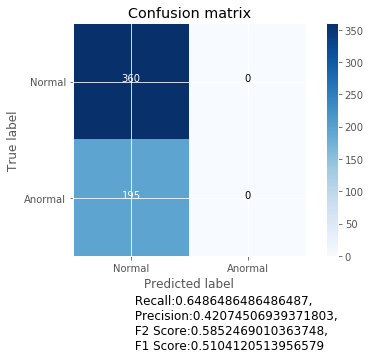

In [38]:
recall = recall_score(y_pred=y_hat_test, y_true=test['state'].values,average='weighted')
precision = precision_score(y_pred=y_hat_test, y_true=test['state'].values,average='weighted')
f2 = fbeta_score(y_pred=y_hat_test, y_true=test['state'].values, beta=2,average='weighted')
f1 = f1_score(y_pred=y_hat_test, y_true=test['state'].values,average='weighted')

cnf_matrix = confusion_matrix(test['state'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal'],
                      recall=recall,precision=precision,f2 = f2,f1=f1,title='Confusion matrix')

In [39]:
%%markdown
# New model 

# New model 


In [40]:
%%markdown
## Types of outliers
In general, outliers can be classified into three categories, namely global outliers, contextual (or conditional) outliers, and collective outliers.

Global outlier — Object significantly deviates from the rest of the data set

Contextual outlier — Object deviates significantly based on a selected context. For example, 28⁰C is an outlier for a Moscow winter, but not an outlier in another context, 28⁰C is not an outlier for a Moscow summer.

Collective outlier — A subset of data objects collectively deviate significantly from the whole data set, even if the individual data objects may not be outliers. For example, a large set of transactions of the same stock among a small party in a short period can be considered as an evidence of market manipulation.

## Types of outliers
In general, outliers can be classified into three categories, namely global outliers, contextual (or conditional) outliers, and collective outliers.

Global outlier — Object significantly deviates from the rest of the data set

Contextual outlier — Object deviates significantly based on a selected context. For example, 28⁰C is an outlier for a Moscow winter, but not an outlier in another context, 28⁰C is not an outlier for a Moscow summer.

Collective outlier — A subset of data objects collectively deviate significantly from the whole data set, even if the individual data objects may not be outliers. For example, a large set of transactions of the same stock among a small party in a short period can be considered as an evidence of market manipulation.


In [41]:
datasets = [train,valid,test]
for i in datasets:
    i = ss_knn.transform(i.drop(['state'],axis=1))

In [42]:
from scipy.stats import multivariate_normal

mu = train.drop('state', axis=1).mean(axis=0).values
sigma = train.drop('state', axis=1).cov().values
model = multivariate_normal(cov=sigma, mean=mu, allow_singular=True)

print(np.median(model.logpdf(valid[valid['state'] == 0].drop('state', axis=1).values))) 
print(np.median(model.logpdf(valid[valid['state'] == 1].drop('state', axis=1).values)))

-83.60417619682434
-663.5831530677033


In [43]:
tresholds = np.linspace(-100,-10, 300)
scores = []
for treshold in tresholds:
    y_hat = (model.logpdf(valid.drop('state', axis=1).values) < treshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['state'].values),
                 precision_score(y_pred=y_hat, y_true=valid['state'].values),
                 fbeta_score(y_pred=y_hat, y_true=valid['state'].values, beta=2)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

0.9838546922300705 0


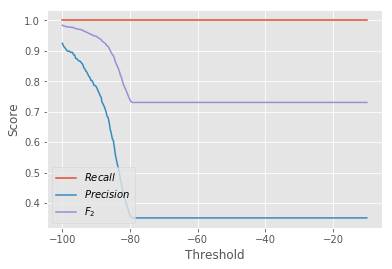

In [44]:
plt.plot(tresholds, scores[:, 0], label='$Recall$')
plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
# plt.xticks(np.logspace(-10, -200, 3))
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

In [45]:
test.to_clipboard()

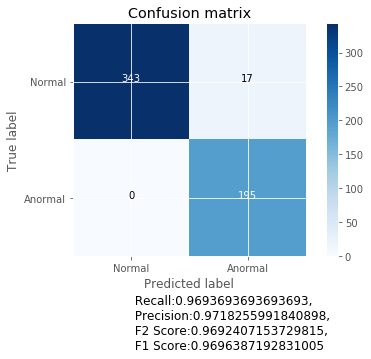

In [46]:
final_tresh = tresholds[scores[:, 2].argmax()]
y_hat_test = (model.logpdf(test.drop('state', axis=1).values) < final_tresh).astype(int)

recall = recall_score(y_pred=y_hat_test, y_true=test['state'].values,average='weighted')
precision = precision_score(y_pred=y_hat_test, y_true=test['state'].values,average='weighted')
f2 = fbeta_score(y_pred=y_hat_test, y_true=test['state'].values, beta=2,average='weighted')
f1 = f1_score(y_pred=y_hat_test, y_true=test['state'].values,average='weighted')

cnf_matrix = confusion_matrix(test['state'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal'],
                      recall=recall,precision=precision,f2 = f2,f1=f1, title='Confusion matrix')

In [47]:
test.to_clipboard()

In [48]:
combined_data = data_features.append(anomaly_features)

In [49]:
combined_data['state'] = combined_data['state'].apply(lambda x: 1 if x == 'anomaly' else 0)

In [50]:
columns_data = combined_data.columns
columns_data = columns_data.drop('state')

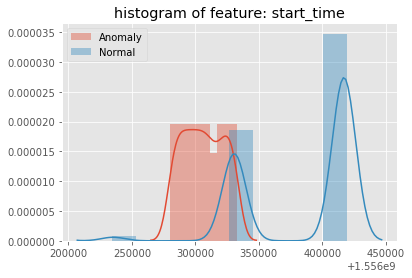

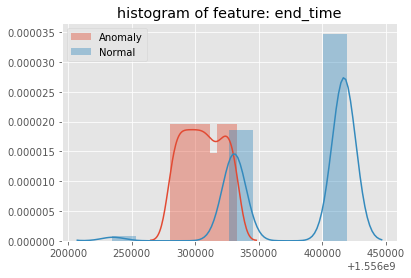

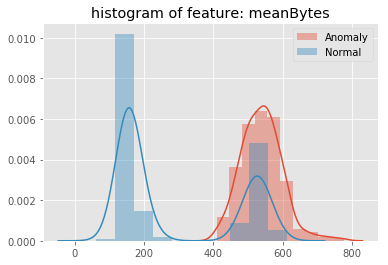

/Users/abhijit/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


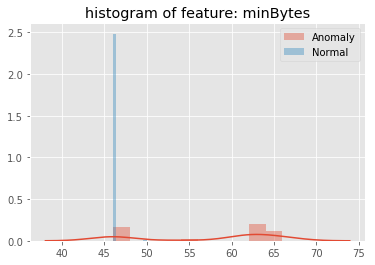

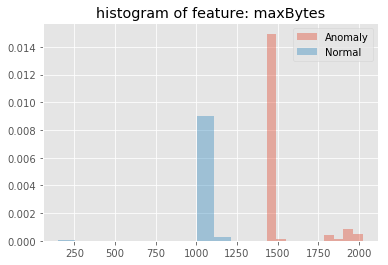

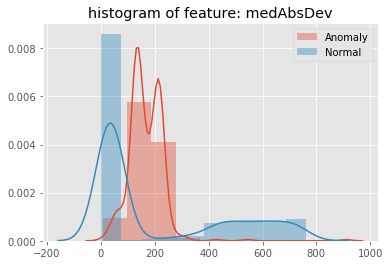

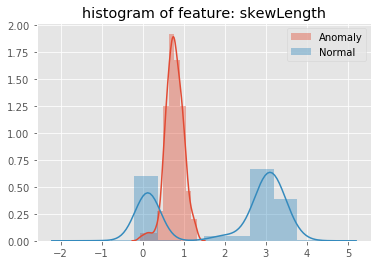

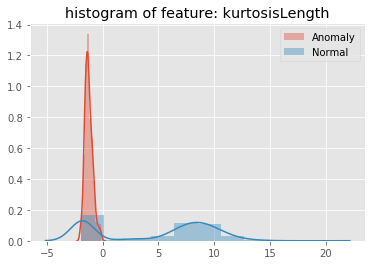

/Users/abhijit/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


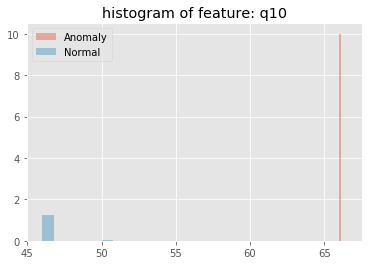

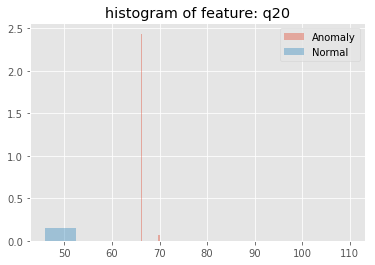

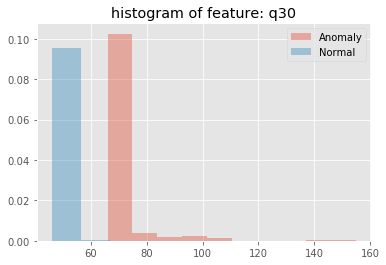

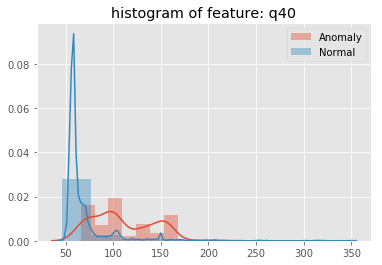

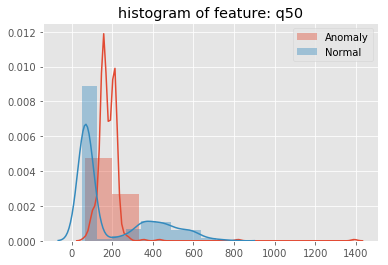

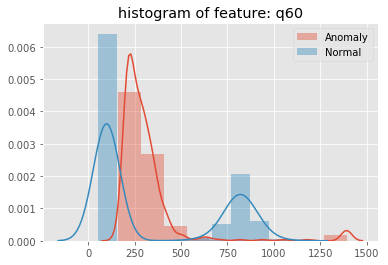

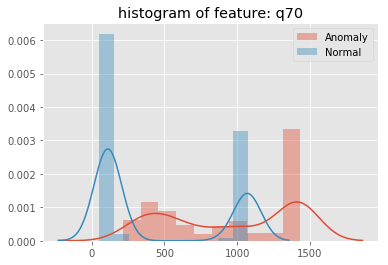

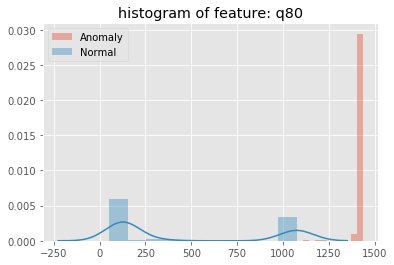

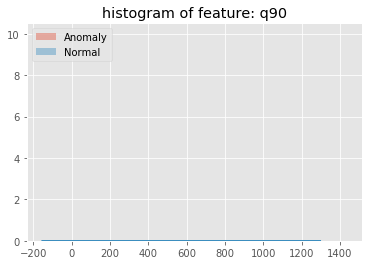

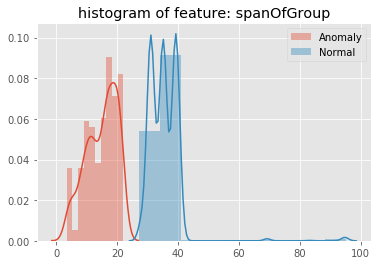

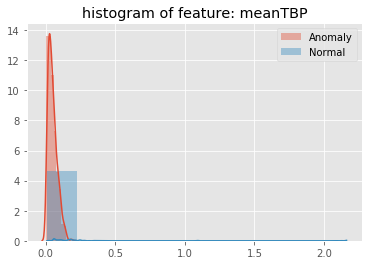

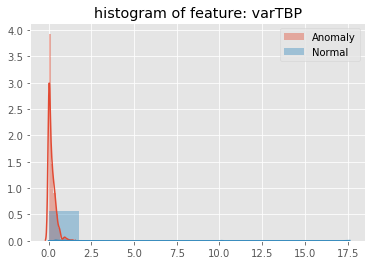

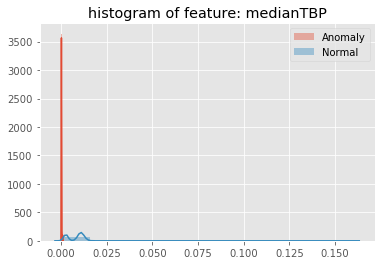

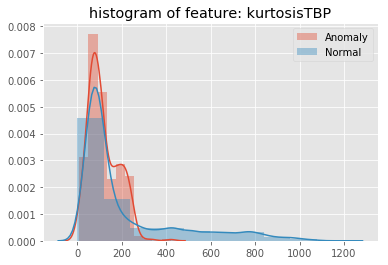

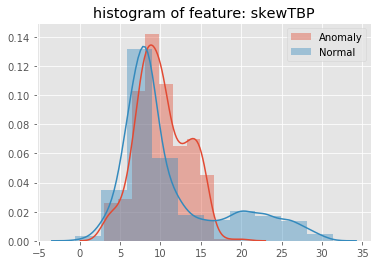

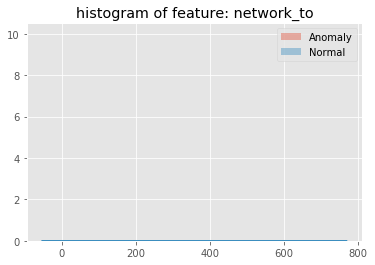

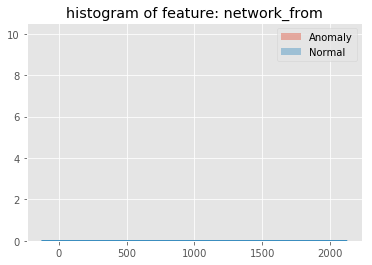

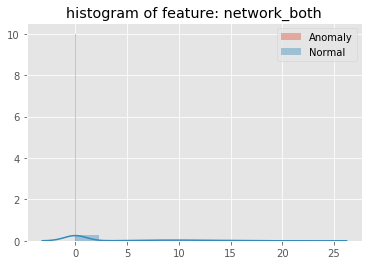

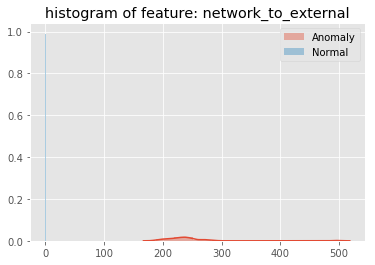

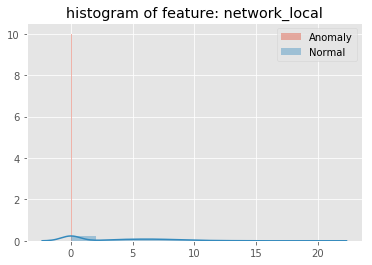

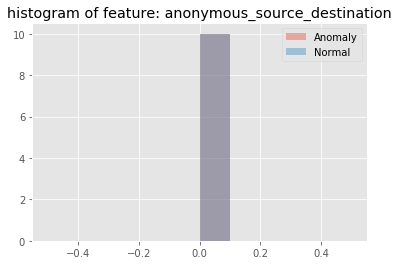

In [51]:
import seaborn as sns 
import matplotlib.gridspec as gridspec
dataset = combined_data
# plt.figure(figsize=(12,28*5))
# gs = gridspec.GridSpec(28, 1)
for feature in columns_data:
    ax = plt.subplot()
    sns.distplot(dataset[feature][dataset.state == 1], bins=10, label='Anomaly')
    sns.distplot(dataset[feature][dataset.state == 0], bins=10, label='Normal')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(feature))
    plt.legend(loc='best')
    plt.show()

In [52]:
%%markdown
## Saving the new model. 

## Saving the new model. 


In [53]:
d = dict({'mvmodel' : model, 'treshold' : final_tresh})

In [54]:
f = open("/Users/abhijit/IOT_Project/intl-iot/timestep-model/anomaly_models/multivariate_model_yi_camera.pkl", "wb")
pickle.dump(d, f)
f.close()

In [55]:
print(final_tresh)

-100.0
